<a href="https://colab.research.google.com/github/vishyarjun/finetuning_llm_lessons/blob/main/qwen_vision_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl triton cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
!pip install --no-deps unsloth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.7/335.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does 

In [4]:
from unsloth import FastVisionModel
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [5]:
fourbit_models = ["unsloth/Llama-3.2-11B-Vision_instruct-bnb-4bit",
                  "unsloth/Qwen2-VL-7B-bnb-4bit"
                  ]

In [6]:
model,tokenizer = FastVisionModel.from_pretrained("unsloth/Qwen2-VL-7B-Instruct",
                                                  load_in_4bit=True,
                                                  use_gradient_checkpointing="unsloth"
                                                  )

==((====))==  Unsloth 2025.3.19: Fast Qwen2_Vl patching. Transformers: 4.50.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.85G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [7]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers=True,
    finetune_language_layers=True,
    finetune_attention_modules=True,
    finetune_mlp_modules=True,

    r=16,
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    random_state = 3407,
    use_rslora=False,
    loftq_config=None
)

Unsloth: Making `model.base_model.model.visual` require gradients


In [8]:
from datasets import load_dataset
dataset = load_dataset("unsloth/Latex_OCR", split="train")

README.md:   0%|          | 0.00/519 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68686 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7632 [00:00<?, ? examples/s]

In [9]:
dataset[1]["text"]

'D _ { \\mu } ^ { \\alpha \\beta } \\bar { A } _ { \\mu } ^ { \\alpha \\beta } = 0 ,'

In [10]:
instruction = "Write the LaTex representation of the given image"

In [11]:
def convert_to_conversation(sample):
  conversation = [
      {
          "role":"user",
          "content": [
              {"type":"text", "text":instruction},
              {"type":"image", "image":sample["image"]},
          ]

      },

      {
          "role":"assistant",
          "content": [
              {"type":"text", "text":sample["text"]}
          ]

      }
  ]
  return {"messages":conversation}

In [12]:
convert_to_conversation(dataset[0])

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTex representation of the given image'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}]}]}

In [13]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTex representation of the given image'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=280x40>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '\\{ x _ { \\mu } , n _ { \\nu } \\} = - \\frac { n _ { \\mu } p _ { \\nu } } { p ^ { 2 } } ; \\{ x _ { \\mu } , { p _ { n } } _ { \\nu } \\} = - \\frac { { p _ { n } } _ { \\mu } p _ { \\nu } } { p ^ { 2 } } .'}]}]}

In [14]:
FastVisionModel.for_inference(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (visual): Qwen2VisionTransformerPretrainedModel(
        (patch_embed): PatchEmbed(
          (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
        (rotary_pos_emb): VisionRotaryEmbedding()
        (blocks): ModuleList(
          (0-18): 19 x Qwen2VLVisionBlock(
            (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (attn): VisionSdpaAttention(
              (qkv): lora.Linear(
                (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=1280, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(


In [15]:
image = dataset[1]["image"]
messages = [
    {
        "role":"user",
        "content": [
            {"type":"text", "text":instruction},
            {"type":"image", "image":image},
        ]
    }
]


In [16]:
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,input_text,
    return_tensors="pt"
).to("cuda")

In [17]:
from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt=True)
_ = model.generate(**inputs, streamer=text_streamer, max_new_tokens = 128, use_cache=True, temperature = 1.5, min_p=0.1)

The given image can be represented in LaTeX as:

\[
D_{\mu} \tilde{A}^{\mu} = 0
\]<|im_end|>


In [32]:
dataset[1]["text"]

'D _ { \\mu } ^ { \\alpha \\beta } \\bar { A } _ { \\mu } ^ { \\alpha \\beta } = 0 ,'

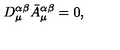

In [33]:
dataset[1]["image"]

In [18]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

In [19]:
FastVisionModel.for_inference(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (visual): Qwen2VisionTransformerPretrainedModel(
        (patch_embed): PatchEmbed(
          (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
        (rotary_pos_emb): VisionRotaryEmbedding()
        (blocks): ModuleList(
          (0-18): 19 x Qwen2VLVisionBlock(
            (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (attn): VisionSdpaAttention(
              (qkv): lora.Linear(
                (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=1280, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(


In [20]:
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer),
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        warmup_steps = 5,
        max_steps=30,
        learning_rate = 2e-4,
        fp16= not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps=1,
        optim="adamw_8bit",
        output_dir = "output",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed=3407,
        report_to="none",
        remove_unused_columns=False,
        dataset_text_field="",
        dataset_kwargs = {"skip_prepare_set": True},
        dataset_num_proc=4,
        max_seq_length=2048
    )
    )


Unsloth: Model does not have a default image size - using 512


In [21]:
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 68,686 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 50,855,936/7,000,000,000 (0.73% trained)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,1.149100
2,1.287100
3,1.386100
4,0.963600
5,0.868500
6,0.840300
7,0.652000
8,0.418800
9,0.257400
10,0.279500


TrainOutput(global_step=30, training_loss=0.37348755026857056, metrics={'train_runtime': 263.2234, 'train_samples_per_second': 0.912, 'train_steps_per_second': 0.114, 'total_flos': 1673161698422784.0, 'train_loss': 0.37348755026857056})

In [22]:
FastVisionModel.for_inference(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (visual): Qwen2VisionTransformerPretrainedModel(
        (patch_embed): PatchEmbed(
          (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
        (rotary_pos_emb): VisionRotaryEmbedding()
        (blocks): ModuleList(
          (0-18): 19 x Qwen2VLVisionBlock(
            (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
            (attn): VisionSdpaAttention(
              (qkv): lora.Linear(
                (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=1280, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(


In [23]:
image = dataset[2]["image"]
instruction = "Write the LaTex representation of the given image"


In [24]:
messages = [
    {"role": "system", "content": [
        {"type":"image"},
        {"type":"text","text":instruction}
    ]}
]

In [25]:
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,input_text,
    add_special_tokens=False,
    return_tensors="pt"
).to("cuda")

In [26]:
from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt=True)

_ = model.generate(**inputs, streamer=text_streamer, max_new_tokens = 128, use_cache=True, temperature = 1.5, min_p=0.1)

H ^ { \prime } = \beta N \int d \lambda \left\{ \frac { 1 } { 2 \beta ^ { 2 } N ^ { 2 } } \partial _ { \lambda } \zeta ^ { \dagger } \partial _ { \lambda } \zeta + V ( \lambda ) \zeta ^ { \dagger } \zeta \right\} \ .<|im_end|>


In [27]:
dataset[2]["text"]

'H ^ { \\prime } = \\beta N \\int d \\lambda \\biggl \\{ \\frac { 1 } { 2 \\beta ^ { 2 } N ^ { 2 } } \\partial _ { \\lambda } \\zeta ^ { \\dagger } \\partial _ { \\lambda } \\zeta + V ( \\lambda ) \\zeta ^ { \\dagger } \\zeta \\biggr \\} \\ .'